In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:/Users/jites/Desktop/data analytics/extended_fmcg_demand_forecasting.csv")
df.head()


,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
0,2022-01-01,Household,1583,5.190661,0,Urban,5,9.299281,9,207
1,2022-01-02,Personal Care,1103,8.949596,0,Urban,6,13.274109,5,253
2,2022-01-03,Dairy,455,4.867987,0,Rural,0,13.302265,9,245
3,2022-01-04,Personal Care,1107,16.968596,1,Urban,1,10.056158,5,265
4,2022-01-05,Personal Care,1447,4.309673,1,Rural,2,3.562862,8,334


In [7]:
df.tail()

,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
995,2024-09-22,Snacks,1766,17.560357,0,Suburban,6,0.865387,8,372
996,2024-09-23,Beverages,1023,5.877190,1,Urban,0,5.645062,4,188
997,2024-09-24,Beverages,1837,13.640550,0,Suburban,1,11.813083,6,170
998,2024-09-25,Household,854,16.206743,0,Suburban,2,8.676447,9,143
999,2024-09-26,Dairy,134,13.590626,1,Urban,3,4.286855,5,178


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1000 non-null   object 
 1   Product_Category         1000 non-null   object 
 2   Sales_Volume             1000 non-null   int64  
 3   Price                    1000 non-null   float64
 4   Promotion                1000 non-null   int64  
 5   Store_Location           1000 non-null   object 
 6   Weekday                  1000 non-null   int64  
 7   Supplier_Cost            1000 non-null   float64
 8   Replenishment_Lead_Time  1000 non-null   int64  
 9   Stock_Level              1000 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 78.3+ KB


,Sales_Volume,Price,Promotion,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1048.781000,10.362358,0.491000,2.999000,7.552047,4.970000,266.494000
std,539.688298,5.420627,0.500169,2.001751,4.163729,2.589944,130.560078
min,101.000000,1.003580,0.000000,0.000000,0.500445,1.000000,50.000000
25%,591.750000,5.541108,0.000000,1.000000,3.887763,3.000000,152.000000
50%,1064.500000,10.404366,0.000000,3.000000,7.422058,5.000000,260.000000
75%,1489.000000,15.054035,1.000000,5.000000,11.099853,7.000000,376.000000
max,1997.000000,19.944485,1.000000,6.000000,14.993587,9.000000,499.000000


In [14]:
df.dropna(inplace=True)
df["Date"]=pd.to_datetime(df["Date"])
df = df.sort_values('Date')
df.head()

,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level,Revenue,Is_High_Demand
0,2022-01-01,Household,1583,5.190661,0,Urban,5,9.299281,9,207,8216.816954,True
1,2022-01-02,Personal Care,1103,8.949596,0,Urban,6,13.274109,5,253,9871.404371,True
2,2022-01-03,Dairy,455,4.867987,0,Rural,0,13.302265,9,245,2214.934234,False
3,2022-01-04,Personal Care,1107,16.968596,1,Urban,1,10.056158,5,265,18784.235461,True
4,2022-01-05,Personal Care,1447,4.309673,1,Rural,2,3.562862,8,334,6236.097403,True


In [10]:
df["Revenue"]=df["Sales_Volume"]*df["Price"]
df.head()

,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level,Revenue
0,2022-01-01,Household,1583,5.190661,0,Urban,5,9.299281,9,207,8216.816954
1,2022-01-02,Personal Care,1103,8.949596,0,Urban,6,13.274109,5,253,9871.404371
2,2022-01-03,Dairy,455,4.867987,0,Rural,0,13.302265,9,245,2214.934234
3,2022-01-04,Personal Care,1107,16.968596,1,Urban,1,10.056158,5,265,18784.235461
4,2022-01-05,Personal Care,1447,4.309673,1,Rural,2,3.562862,8,334,6236.097403


In [11]:
average=df["Sales_Volume"].mean()
df["Is_High_Demand"]=df["Sales_Volume"]>average
df.head()

,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level,Revenue,Is_High_Demand
0,2022-01-01,Household,1583,5.190661,0,Urban,5,9.299281,9,207,8216.816954,True
1,2022-01-02,Personal Care,1103,8.949596,0,Urban,6,13.274109,5,253,9871.404371,True
2,2022-01-03,Dairy,455,4.867987,0,Rural,0,13.302265,9,245,2214.934234,False
3,2022-01-04,Personal Care,1107,16.968596,1,Urban,1,10.056158,5,265,18784.235461,True
4,2022-01-05,Personal Care,1447,4.309673,1,Rural,2,3.562862,8,334,6236.097403,True


<Axes: xlabel='Date'>

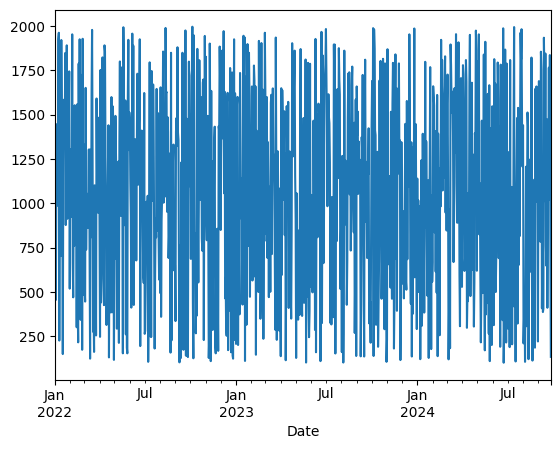

In [22]:
df.groupby('Date')['Sales_Volume'].sum().plot()



In [1]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.3 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/13.3 MB 4.0 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/13.3 MB 4.2 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/13.3 MB 3.8 MB/s eta 0:00:03
   ----------- ---------------------------- 3.9/13.3 MB 4.0 MB/s eta 0:00:03
   -------------- ------------------------- 5.0/13.3 MB 4.1 MB/s eta 0:00:03
   ----------------- ---------------------- 5.8/13.3 MB 4.1 MB/s eta 0:00:02
   -------------------- ------------------- 6.8/13.3 MB 4.1 MB/s eta 0:00:02
   ---------------------- ----------------- 7.6/13.3 MB 4.2 MB/s eta 0:00:02
   ------------------------- -------------- 8.4/13.3 MB 4.0 MB/s eta 0:00:02
   -------------------------- ------------- 8.9/13.3 MB 4.0 MB/s eta 0:00:02
   ----------------------------- ---------- 10.0/13.3 MB 4.0 MB/s eta 0:00:01
   --

In [18]:
daily_sales = df.groupby('Date')['Sales_Volume'].sum()

daily_sales = daily_sales.asfreq('D') 



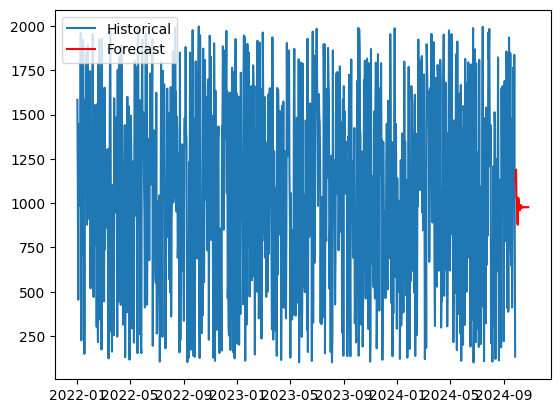

In [20]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(daily_sales, order=(5, 1, 0))  # order can be tuned
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

plt.plot(daily_sales, label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.show()

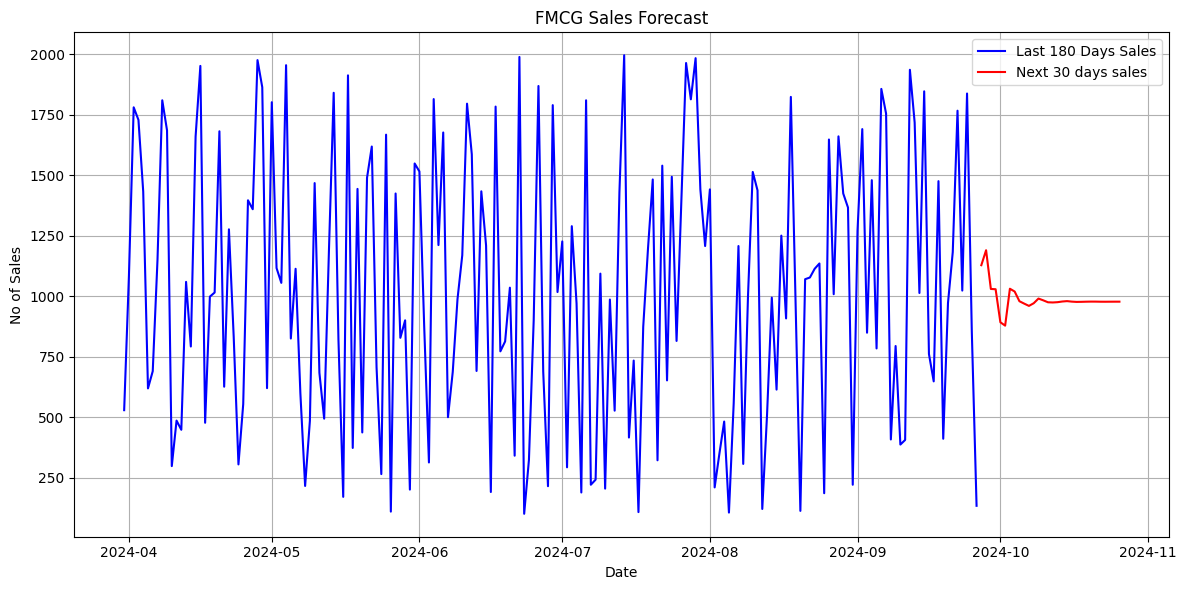

In [29]:
# Show last 180 days of history
daily_sales_last = daily_sales[-180:]

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Plot
plt.figure(figsize=(12,6))
plt.plot(daily_sales_last, label='Last 180 Days Sales', color='blue')
plt.plot(forecast.index,forecast,label="Next 30 days sales",color="red")
plt.title("FMCG Sales Forecast")
plt.xlabel("Date")
plt.ylabel("No of Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()